# 1. Scala's real-world project repository data
Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pulls_one=pd.read_csv('D:\CSV\data Science Proj 2-github history of scala\pulls_2011-2013.csv')
pulls_one

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z
...,...,...,...
3291,547941,xeno-by,2011-12-01T16:16:42Z
3292,547354,szeiger,2011-12-01T14:03:23Z
3293,547150,odersky,2011-12-01T12:39:40Z
3294,547003,robinst,2011-12-01T11:42:26Z


In [3]:
pulls_two=pd.read_csv('D:\CSV\data Science Proj 2-github history of scala\pulls_2014-2018.csv')
pulls_two

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z
...,...,...,...
2899,11244241,folone,2014-01-06T09:07:34Z
2900,11240674,clhodapp,2014-01-06T03:52:23Z
2901,11234757,xeno-by,2014-01-05T12:23:24Z
2902,11231462,rklaehn,2014-01-04T22:42:02Z


In [4]:
pull_files=pd.read_csv('D:\CSV\data Science Proj 2-github history of scala\pull_files.csv')
pull_files

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java
...,...,...
85583,547354,test/files/run/bitsets.check
85584,547354,test/files/run/bitsets.scala
85585,547150,src/compiler/scala/tools/nsc/transform/LiftCod...
85586,547150,src/library/scala/reflect/api/Trees.scala


## 2. Preparing and cleaning the data

In [5]:
pulls= pd.concat([pulls_one, pulls_two])
pulls

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z
...,...,...,...
2899,11244241,folone,2014-01-06T09:07:34Z
2900,11240674,clhodapp,2014-01-06T03:52:23Z
2901,11234757,xeno-by,2014-01-05T12:23:24Z
2902,11231462,rklaehn,2014-01-04T22:42:02Z


In [6]:
pulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     6200 non-null   int64 
 1   user    6200 non-null   object
 2   date    6200 non-null   object
dtypes: int64(1), object(2)
memory usage: 193.8+ KB


In [7]:
# converting date column datatype to date
pulls["date"]= pd.to_datetime(pulls["date"])
pulls["date"][:5]   #year-month-date hr:min:sec

0   2013-12-31 23:10:55+00:00
1   2013-12-31 16:55:47+00:00
2   2013-12-31 02:41:13+00:00
3   2013-12-30 23:45:47+00:00
4   2013-12-29 17:21:01+00:00
Name: date, dtype: datetime64[ns, UTC]

## 3. Merging the DataFrames

In [8]:
data= pd.merge(pulls, pull_files, on="pid")
data

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....
...,...,...,...,...
85583,11231462,rklaehn,2014-01-04 22:42:02+00:00,src/library/scala/collection/immutable/HashSet...
85584,11188295,rklaehn,2014-01-02 18:55:33+00:00,src/library/scala/collection/immutable/HashSet...
85585,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253a.scala
85586,11188295,rklaehn,2014-01-02 18:55:33+00:00,test/files/run/t6253b.scala


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 85587
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     85588 non-null  int64              
 1   user    85588 non-null  object             
 2   date    85588 non-null  datetime64[ns, UTC]
 3   file    85588 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 3.3+ MB


In [10]:
data.isnull().sum()

pid     0
user    0
date    0
file    0
dtype: int64

Questions:
  1. is contributuion to this project consistent in all years
  2. Who did most contribution
  3. in which period was least and most contribution
  4. how many people made changes in particular file or folder

In [11]:
data["date"].sort_values()

51401   2011-12-01 11:42:26+00:00
51400   2011-12-01 12:39:40+00:00
51399   2011-12-01 12:39:40+00:00
51397   2011-12-01 14:03:23+00:00
51398   2011-12-01 14:03:23+00:00
                   ...           
51405   2018-01-16 23:29:16+00:00
51408   2018-01-16 23:29:16+00:00
51404   2018-01-16 23:29:16+00:00
51407   2018-01-16 23:29:16+00:00
51406   2018-01-16 23:29:16+00:00
Name: date, Length: 85588, dtype: datetime64[ns, UTC]

So the data collected from **Dec 2011 to Jan 2018**

## 4. Is the project still actively maintained?

In [12]:
import datetime as dt
data["month"]= data["date"].dt.month
data["year"] = data["date"].dt.year
counts= data.groupby(["year", "month"])["pid"].agg("count")
counts

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
               ... 
2017  9         578
      10        535
      11        172
      12        224
2018  1         202
Name: pid, Length: 74, dtype: int64

<AxesSubplot:xlabel='year,month'>

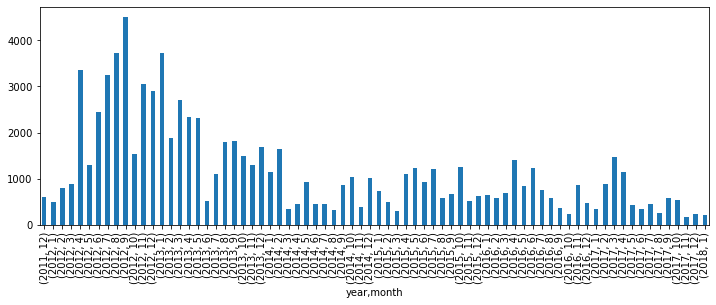

In [13]:
counts.plot(kind="bar", figsize=(12,4))

**2012 April to 2012 Sept** was the period where **highest number of pull requets** were made.
Again from 2012 Nov to 2013 May there was  a spike, and after that, that many pull requests were never made and wasconsistently less.

## 5. Is there camaraderie in the project?
The organizational structure varies from one project to another, and it can influence your success as a contributor. A project that has a very small community might not be the best one to start working on. The small community might indicate a high barrier of entry. This can be caused by several factors, including a community that is reluctant to accept pull requests from "outsiders," that the code base is hard to work with, etc. However, a large community can serve as an indicator that the project is regularly accepting pull requests from new contributors. Such a project would be a good place to start.

In order to evaluate the dynamics of the community, we will plot a histogram of the number of pull requests submitted by each user. A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors.

user
0xmohit           2
193s              4
2m               20
4.00E+06         22
AlexeyIvanov8     2
                 ..
yinxusen          1
yllan             4
ziggystar        22
zsxwing           6
zuvizudar         1
Name: pid, Length: 464, dtype: int64


<AxesSubplot:ylabel='Frequency'>

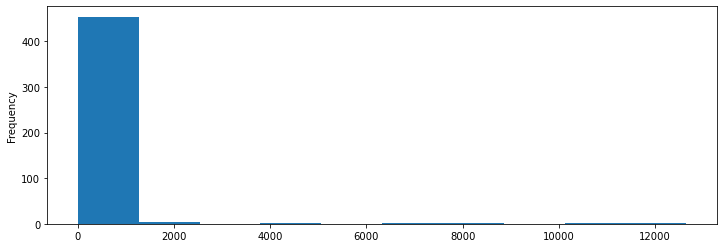

In [24]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby("user")["pid"].agg("count")
print(by_user)
# Plot the histogram
# ... YOUR CODE FOR TASK 5 ...
by_user.plot(kind="hist", figsize=(12,4))

## 6. What files were changed in the last ten pull requests?
Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to understand the parts of the system that have been recently changed. This allows us to pinpoint the "hot" areas of the code where most of the activity is happening. Focusing on those parts might not the most effective use of our times.

In [20]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10, 'date')
# Join the two data sets
joined_pr = last_10.merge(pull_files, on='pid')
# print(joined_pr)
# Identify the unique files
files = set(joined_pr["file"])

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

## 7. Who made the most pull requests to a given file?

In [17]:
# users who made most pull requests in 8 years
# Group by the submitter
# by_user = data.groupby("user")["pid"].agg("count")

by_user.sort_values(ascending=False)

user
xeno-by           12649
retronym          11430
paulp             11260
adriaanm           7722
lrytz              6988
                  ...  
iliffwes              1
jaceklaskowski        1
jacobsallan           1
jbdeboer              1
zuvizudar             1
Name: pid, Length: 464, dtype: int64

**Top 3 contributors are**: xeno-by, retronym, paulp in scala project as a whole with contributions in range 11000 to 12650.

When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.

We identified src/compiler/scala/reflect/reify/phases/Calculate.scala as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.

In [59]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data["file"]==file]
# print(file_pr)  
# Count the number of changes made by each developer
author_counts = file_pr["user"].value_counts()

# Print the top developers
print(author_counts)

xeno-by         11
retronym         5
soc              4
paulp            2
odersky          2
bjornregnell     1
starblood        1
gkossakowski     1
melloc           1
densh            1
zuvizudar        1
Name: user, dtype: int64


**Top 3 contributors in this file** are: xeno -by, retronym, soc with 11, 5, 4 contributions in that file.

## 8. Who made the last ten pull requests on a given file?
Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system.

Like in the previous task, we will look at the history of src/compiler/scala/reflect/reify/phases/Calculate.scala.

In [67]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = data[data.file==file]
file_pr
# Merge the obtained results with the pulls DataFrame
joined_pr = pd.merge(file_pr,pulls,on="pid" )
# print(joined_pr)

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr[:10].user_x)

# Printing the results
users_last_10

{'bjornregnell', 'gkossakowski', 'melloc', 'retronym', 'soc', 'starblood'}

## 9. The pull requests of three special developers
Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.

<AxesSubplot:xlabel='date'>

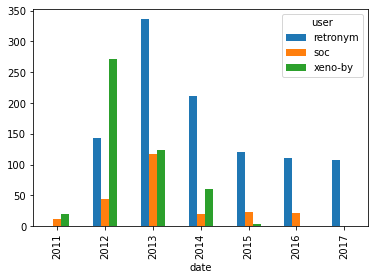

In [64]:
%matplotlib inline

# The developers we are interested in
authors = ['retronym','xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls["user"].isin(authors)]

# Count the number of pull requests submitted each year
counts = by_author.groupby(["user", by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
# print(counts)

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot(kind="bar")

## 10. Visualizing the contributions of each developer
As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) In our case, we want to see which of our three developers of interest have the most experience with the code in a given file. We will measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.

user  retronym  soc  xeno-by
date                        
2012         0    2       10
2013         4    2        0
2014         1    0        1


<AxesSubplot:xlabel='date'>

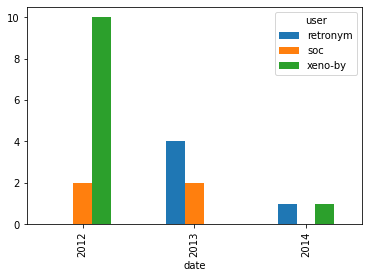

In [57]:
authors = ['retronym','xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data["user"].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author["file"]==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index="date", columns="user", values="pid", fill_value=0)
print(by_file_wide)
# Plot the results
by_file_wide.plot(kind='bar')